In [1]:
import torch
print(f"Torch version: {torch.__version__}")
!pip install torch_geometric --extra-index-url https://data.pyg.org/whl/torch-${torch.__version__.split('+')[0]}%2Bcpu.html
!pip install networkx pandas scikit-learn

Torch version: 2.9.0+cpu
Looking in indexes: https://pypi.org/simple, https://data.pyg.org/whl/torch-.9.0%2Bcpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.5 MB/s eta 0:00:00


In [2]:
import pandas as pd

data = {
    "user_id": [1,1,2,2,3,3,4],
    "account_id": [101,101,102,102,103,103,104],
    "transaction_id": [1,2,3,4,5,6,7],
    "amount": [500,20000,1500,30000,700,40000,1000],
    "fraud": [0,1,0,1,0,1,0]
}

df = pd.DataFrame(data)
df.to_csv("transactions.csv", index=False)
df


,user_id,account_id,transaction_id,amount,fraud
0,1,101,1,500,0
1,1,101,2,20000,1
2,2,102,3,1500,0
3,2,102,4,30000,1
4,3,103,5,700,0
5,3,103,6,40000,1
6,4,104,7,1000,0


from matplotlib import pyplot as plt
df['user_id'].plot(kind='hist', bins=20, title='user_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['account_id'].plot(kind='hist', bins=20, title='account_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['transaction_id'].plot(kind='hist', bins=20, title='transaction_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['amount'].plot(kind='hist', bins=20, title='amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='user_id', y='account_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='account_id', y='transaction_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='transaction_id', y='amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='amount', y='fraud', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['user_id']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('user_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['user_id']
  ys = series['fraud']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('user_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('fraud')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['user_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'user_id'}, axis=1)
              .sort_values('user_id', ascending=True))
  xs = counted['user_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('user_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['account_id']
  ys = series['amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('account_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('account_id')
_ = plt.ylabel('amount')

from matplotlib import pyplot as plt
df['user_id'].plot(kind='line', figsize=(8, 4), title='user_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['account_id'].plot(kind='line', figsize=(8, 4), title='account_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['transaction_id'].plot(kind='line', figsize=(8, 4), title='transaction_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['amount'].plot(kind='line', figsize=(8, 4), title='amount')
plt.gca().spines[['top', 'right']].set_visible(False)

Graph Construction

In [3]:
import networkx as nx
import torch
from torch_geometric.utils import from_networkx
import pandas as pd

def build_graph(csv_path):
    df = pd.read_csv(csv_path)
    G = nx.Graph()

    added_nodes = set()

    for _, row in df.iterrows():
        user = f"user_{row['user_id']}"
        account = f"account_{row['account_id']}"
        txn = f"txn_{row['transaction_id']}"

        if user not in added_nodes:
            G.add_node(user, node_type=0, label=0)
            added_nodes.add(user)
        if account not in added_nodes:
            G.add_node(account, node_type=1, label=0)
            added_nodes.add(account)
        if txn not in added_nodes:
            G.add_node(txn, node_type=2, label=row['fraud'])
            added_nodes.add(txn)

        G.add_edge(user, account)
        G.add_edge(account, txn)

    return G

def to_pyg_data(G):
    data = from_networkx(G)

    node_types = [G.nodes[n]['node_type'] for n in G.nodes]
    data.x = torch.nn.functional.one_hot(
        torch.tensor(node_types), num_classes=3
    ).float()

    labels, mask = [], []
    for n in G.nodes:
        if G.nodes[n]['node_type'] == 2:
            labels.append(G.nodes[n]['label'])
            mask.append(True)
        else:
            labels.append(0)
            mask.append(False)

    data.y = torch.tensor(labels)
    data.txn_mask = torch.tensor(mask)
    return data

G = build_graph("transactions.csv")
data = to_pyg_data(G)
data

Data(edge_index=[2, 22], node_type=[15], label=[15], num_nodes=15, x=[15, 3], y=[15], txn_mask=[15])

GNN Model

In [4]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(3, 32)
        self.conv2 = GCNConv(32, 16)
        self.fc = torch.nn.Linear(16, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return self.fc(x)

model = GNN()
model


GNN(
  (conv1): GCNConv(3, 32)
  (conv2): GCNConv(32, 16)
  (fc): Linear(in_features=16, out_features=2, bias=True)
)

Training Loop

In [5]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

model.train()
for epoch in range(50):
    optimizer.zero_grad()
    out = model(data)

    loss = criterion(
        out[data.txn_mask],
        data.y[data.txn_mask]
    )

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.6851
Epoch 10, Loss: 0.6766
Epoch 20, Loss: 0.6531
Epoch 30, Loss: 0.6140
Epoch 40, Loss: 0.5984


Evaluation Metrics

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_score, recall_score,
    roc_auc_score, roc_curve,
    confusion_matrix, ConfusionMatrixDisplay
)

model.eval()
with torch.no_grad():
    logits = model(data)
    probs = torch.softmax(logits, dim=1)[:, 1]

y_true = data.y[data.txn_mask].cpu().numpy()
y_pred = (probs[data.txn_mask] > 0.5).cpu().numpy()
y_prob = probs[data.txn_mask].cpu().numpy()

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"AUC: {auc:.3f}")


Precision: 0.500
Recall: 1.000
AUC: 0.625


ROC Curve Plot

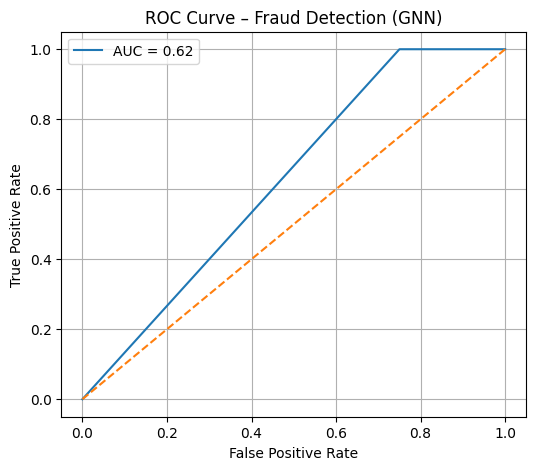

In [7]:
fpr, tpr, _ = roc_curve(y_true, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Fraud Detection (GNN)")
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix Plot

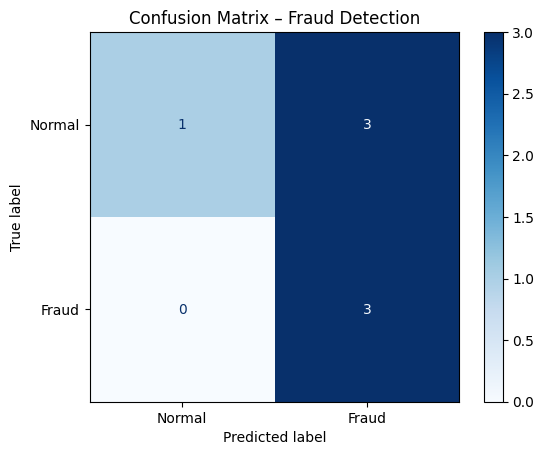

In [8]:
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Normal", "Fraud"]
)

disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Fraud Detection")
plt.show()


Visualize Graph

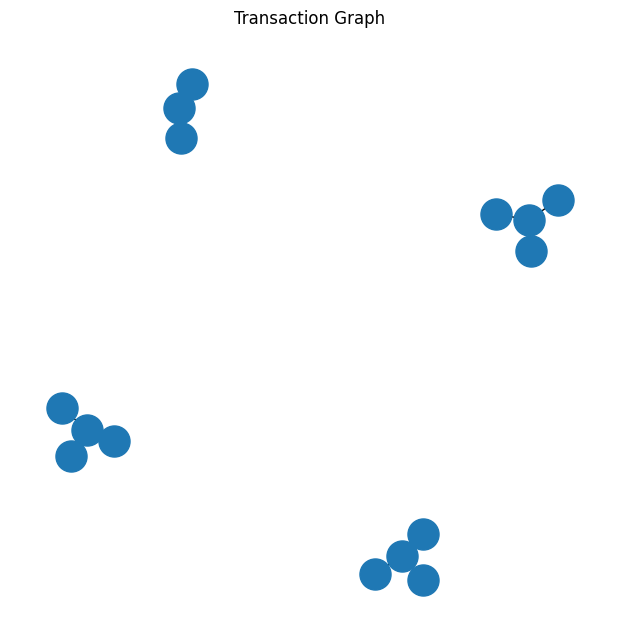

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
nx.draw(G, node_size=500, with_labels=False)
plt.title("Transaction Graph")
plt.show()
